# fruits를 KNN으로 분류하기

In [1]:
import pandas as pd
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Feature Set과 Target Set을 Numpy의 Array로 변경

In [2]:
# 연습 : numpy의 column stack과 row stack
import numpy as np
testA = np.array([1,2,3,4])
testB = np.array([10,20,30,40])

In [3]:
# 2개의  array를 묶어서 컬럼기반으로 하나의 array로 만들기
combineA = [[i,j] for i,j in zip(testA,testB) ]
print(np.array(combineA))

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [4]:
# 다른 방법
combineB = np.column_stack((testA,testB))
print(combineB)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [5]:
combineC = np.row_stack((testA,testB))
print(combineC)

[[ 1  2  3  4]
 [10 20 30 40]]


---

In [10]:
fruit_data = np.column_stack((fruits.length,fruits.weight))
fruit_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [11]:
fruit_target = np.array(fruits['name'])
fruit_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# sklearn으로 train test 분류
train_input,test_input,train_target,test_target = train_test_split(
    fruit_data,fruit_target,stratify=fruit_target,random_state=42
)

In [26]:
# knn으로 학습시키고 
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [27]:
# 정확도 출력하기
kn.score(test_input,test_target)

1.0

---
# 수상한 과일?

In [28]:
kn.predict([[25,150]])

array(['berry'], dtype=object)

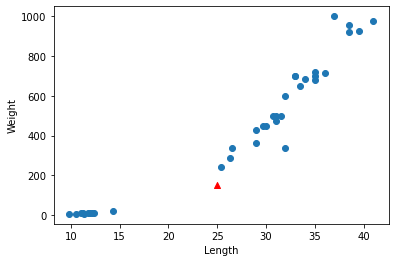

In [32]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^',c='red')

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

> apple쪽에 가까운 것 같은데 berry라니?

In [35]:
# 이웃을 출력해보자
distance, indexes = kn.kneighbors([[25,150]])
print(indexes)

[[11 20 13 22 15]]


In [36]:
# 이웃의 index에 해당하는 Feature를 출력
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

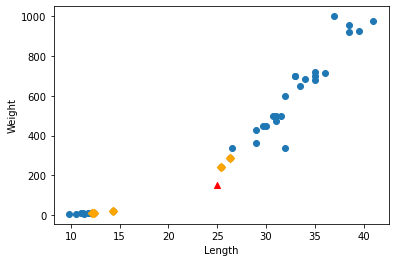

In [44]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^',c='red')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D',c='orange')

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [39]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

In [40]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

---
# 기준을 맞추자

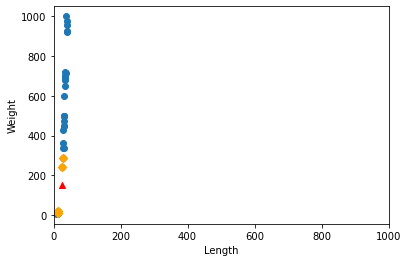

In [46]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^',c='red')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D',c='orange')

plt.xlabel("Length")
plt.ylabel("Weight")
plt.xlim(0,1000)
plt.show()

> sample(=data)이 Length에는 거의 영향을 받지 않고 Weight에서 영향을 많이 받는다.<br> 
> 차트의 모양대로 현재는 berry로 생각하는 것이 맞는 것 같다.

In [48]:
# Length와 Weight의 평균과 표준편차를 구해서 비교해보자
mean = np.mean(train_input,axis=0) 
std = np.std(train_input,axis=0)

In [49]:
print(mean,std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


> Length와 Weight의 차이가 너무 심하다 => 표준화로 해결

---
# train_data를 표준점수(Z점수)로 변경하자
표준점수 = (Feature-평균)/표준편차

In [56]:
train_scaled = (train_input - mean) / std
train_scaled[0:5] 

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

In [57]:
# sklearn을 이용한 방법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_input)
train_scaled2 = scaler.transform(train_input)
train_scaled2[0:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

### 전처리 데이터로 모델 훈련하기

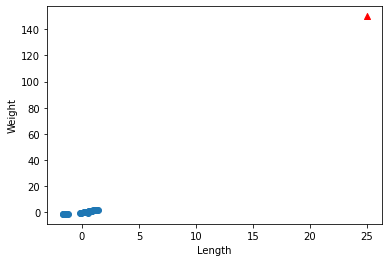

In [60]:
plt.scatter(train_scaled2[:,0],train_scaled2[:,1])
plt.scatter(25,150,marker='^',c='red')

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

> 예측할 데이터로 표준점수로 변경이 필요

In [61]:
new = ([25,150]-mean) / std
new

array([-0.19158198, -0.89671889])

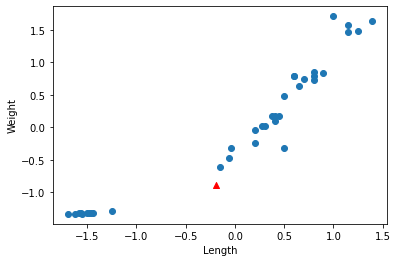

In [62]:
plt.scatter(train_scaled2[:,0],train_scaled2[:,1])
plt.scatter(new[0],new[1],marker='^',c='red')

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [63]:
### KNN으로 분류
kn.fit(train_scaled2,train_target)

KNeighborsClassifier()

In [64]:
# 검증 데이터도 표준점수로 변경(*** 중요: 평균과 표준편차는 Train Set에서 구한 값으로 사용한다.)
test_scaled = (test_input - mean) / std

In [65]:
# 정확도 확인
kn.score(test_scaled,test_target)

1.0

In [68]:
# 수상한 과일을 다시 예측하자
print(kn.predict([new]))

['apple']


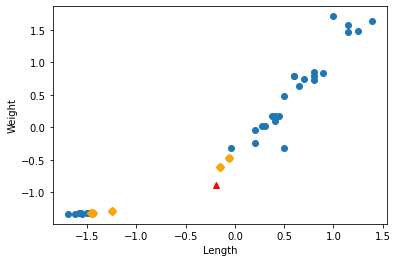

In [72]:
# 확인을 위해 이웃을 출력하자
distance, indexed = kn.kneighbors([new])

plt.scatter(train_scaled2[:,0],train_scaled2[:,1])
plt.scatter(new[0],new[1],marker='^',c='red')
plt.scatter(train_scaled2[indexes,0],train_scaled2[indexes,1],marker='D',c='orange')

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()